In [1]:
import numpy as np
import pandas as pd

from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp2data1'
urlretrieve(URL, 'beers.csv')


('beers.csv', <http.client.HTTPMessage at 0x212bc472730>)

In [4]:
beers = pd.read_csv("beers.csv")
type(beers)

pandas.core.frame.DataFrame

In [5]:
beers

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...,...
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [7]:
beers['abv']

0       0.050
1       0.066
2       0.071
3       0.090
4       0.075
        ...  
2405    0.067
2406    0.052
2407    0.055
2408    0.055
2409    0.052
Name: abv, Length: 2410, dtype: float64

In [8]:
abv_series = beers['abv']

In [9]:
len(abv_series)

2410

In [25]:

abv_clean = abv_series.dropna()
print(abv_clean)

0       0.050
1       0.066
2       0.071
3       0.090
4       0.075
        ...  
2405    0.067
2406    0.052
2407    0.055
2408    0.055
2409    0.052
Name: abv, Length: 2348, dtype: float64


In [16]:
len(abv_clean)

1403

In [26]:
abv = abv_clean.values
len(abv)


2348

In [27]:

type(abv)

numpy.ndarray

In [58]:
beers['ibu']
ibu_series = beers['ibu']
len(ibu_series)
ibu_clean = ibu_series.dropna()
ibu = ibu_clean.values
print(ibu)
len(ibu)

[60. 92. 45. ... 50. 45. 40.]


1403

In [59]:
abv_min = np.min(abv)
abv_max = np.max(abv)

In [68]:
print(abv_min)
print(abv_max)

0.001
0.128


In [69]:
ibu_min = np.min(ibu)
ibu_max = np.max(ibu)
print(ibu_min)
print(ibu_max)

4.0
138.0


In [70]:
abv_mean = np.mean(abv)
ibu_mean = np.mean(ibu)

In [71]:
print('The mean value for abv is {} and for ibu {}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.059773424190800686 and for ibu 42.73984319315752


In [72]:
print('The mean value for abv is {:.4f} and for ibu {:.4f}'.format(abv_mean, ibu_mean))

The mean value for abv is 0.0598 and for ibu 42.7398


In [73]:
x = np.array([1,2,3,4])
print(np.logical_and(1<x, x<4))
num_ele = np.logical_and(1<x, x<4).sum()
print(num_ele)

[False  True  True False]
2


In [74]:
abv_std = np.std(abv)

print(abv_std)

ibu_std = np.std(ibu)

print(ibu_std)


0.013538849735449245
25.95343770210456


In [84]:
def std_percentages(x, x_mean, x_std):
    """ Computes the percentage of coverage at 1std, 2std and 3std from the
    mean value of a certain variable x.
    
    Arguments
    ---------
    x      : array, data we want to compute on. 
    x_mean : float, mean value of x array.
    x_std  : float, standard deviation of x array.
    
    Returns
    -------
    
    per_std_1 : float, percentage of values within 1 standard deviation.
    per_std_2 : float, percentage of values within 2 standard deviations.
    per_std_3 : float, percentage of values within 3 standard deviations.    
    """
    
    std_1 = x_std
    std_2 = 2 * x_std
    std_3 = 3 * x_std
    
    elem_std_1 = np.logical_and((x_mean - std_1) < x, x < (x_mean + std_1)).sum()
    per_std_1 = elem_std_1 * 100 / len(x) 
    
    elem_std_2 = np.logical_and((x_mean - std_2) < x, x < (x_mean + std_2)).sum()
    per_std_2 = elem_std_2 * 100 / len(x) 
    
    elem_std_3 = np.logical_and((x_mean - std_3) < x, x < (x_mean + std_3)).sum()
    per_std_3 = elem_std_3 * 100 / len(x) 
    
    return per_std_1, per_std_2, per_std_3

std_per_abv =std_percentages(abv, abv_mean, abv_std)
std_per_ibu = std_percentages(ibu, ibu_mean, ibu_std)
print(std_percentages(ibu, ibu_mean, ibu_std))
print(std_percentages(abv, abv_mean, abv_std))


(68.06842480399145, 95.65217391304348, 99.71489665003564)
(74.06303236797274, 94.33560477001704, 99.78705281090289)


In [82]:

print('The percentage of coverage at 1 std of the abv_mean is : {:.2f} %'.format(std_per_abv[0]))
print('The percentage of coverage at 2 std of the abv_mean is : {:.2f} %'.format(std_per_abv[1]))
print('The percentage of coverage at 3 std of the abv_mean is : {:.2f} %'.format(std_per_abv[2]))

The percentage of coverage at 1 std of the abv_mean is : 74.06 %
The percentage of coverage at 2 std of the abv_mean is : 94.34 %
The percentage of coverage at 3 std of the abv_mean is : 99.79 %


In [85]:
print('The percentage of coverage at 1 std of the ibu_mean is : {:.2f} %'.format(std_per_ibu)[0])
print('The percentage of coverage at 2 std of the ibu_mean is : {:.2f} %'.format(std_per_ibu)[1])
print('The percentage of coverage at 3 std of the ibu_mean is : {:.2f} %'.format(std_per_ibu)[2])

TypeError: unsupported format string passed to tuple.__format__

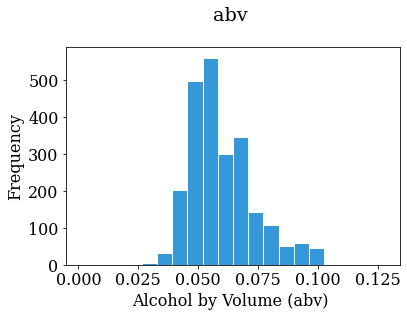

In [77]:
from matplotlib import pyplot
%matplotlib inline

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

pyplot.hist(abv, bins=20, color='#3498db', histtype='bar', edgecolor='white') 
pyplot.title('abv \n')
pyplot.xlabel('Alcohol by Volume (abv) ')
pyplot.ylabel('Frequency');

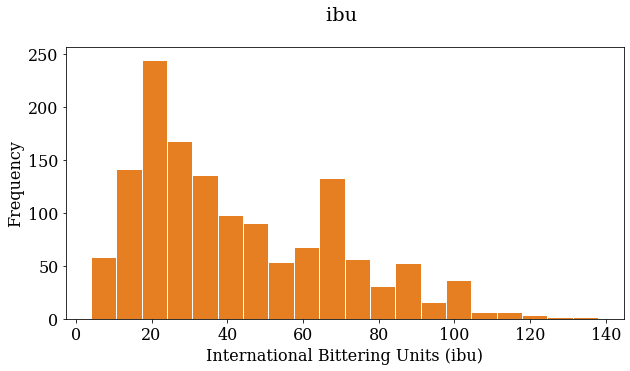

In [78]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.hist(ibu, bins=20, color='#e67e22', histtype='bar', edgecolor='white') 
#The \n is to leave a blanck line between the title and the plot
pyplot.title('ibu \n')
pyplot.xlabel('International Bittering Units (ibu)')
pyplot.ylabel('Frequency');